# Kickstarter Prediction Project (KPP)
This is a project for Data-Science (Comp-3800) at Wentworth Institute of Technology. This project uses a [dataset](https://www.kaggle.com/kemical/kickstarter-projects) on kickstarter projects from Kaggle. I will also use more information scraped from the internet from kickstarter and other locations to create a predictive model on whether a kickstarter project will succeed or not.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

## Cleaning of 2016 Data
The 2016 data contained approximately 625 anomolies because of names of kickstarter projects that contained commmas. These values were thus seperated and then pushed data back columns. The effective data were removed resulting in no type mismatch errors in the dataframe.

In [2]:
#importing the original csv for 2016 data
# Kickstart2016 = pd.read_csv('ks-projects-201612.csv', encoding='latin1')

#Fill nans with -1
# Kickstart2016.fillna(value = -1, inplace = True)
#removed -1 with masking
# Kickstart2016 = Kickstart2016[Kickstart2016.iloc[:,13] == -1]
# remove unnessary columns
# Kickstart2016.drop(columns = [Kickstart2016.columns[13],Kickstart2016.columns[14],Kickstart2016.columns[15],Kickstart2016.columns[16]], inplace = True)

#Exported to new cleaned csv
# Kickstart2016.to_csv('Kickstarter_2016_Cleaned.csv')

## Importing 2018 Data
As I importeed the 2018 Data it became clear that the 2018 Data were already fairly cleaned and also included the data from 2016. It makes more sense now because it is unreasonable to have though that there could have been 378,000 new kickstarters within two years (or 518 new Kickstarters per day).

In [3]:
# Kickstart = pd.read_csv('ks-projects-201801.csv')
# names = Kickstart['name']
# Kickstart

## Web Scraping

I tried to collect some more data on the project by using some webscraping libraries. I tried to loop through the names of all the projects and use the kickstarter json lookup to gather more data. This problem with this is (based on a 10 min run) it would take about 23 hours to run, and it kept running into problems with things like nameing issues, or data entries no longer being available. After about 7.5 hours into a run of this I was looking for a better dataset and I found [one](https://webrobots.io/kickstarter-datasets/). The script also failed while I was looking for that dataset so its was kinda a win-win 

### Script

```Python
for i in names:
    search_page='http://www.kickstarter.com/projects/search.json?search=&term='+ (i.replace('&', '%26'))
    search_page = search_page.replace(' ','%20').replace('%', '%25')
    
    page = requests.get(search_page)
    campaign = json.loads(page.content)
        if(campaign['total_hits'] >= 1):
            tempdf = tempdf.append({'spotlight':campaign['projects'][0]['spotlight'], 'staff_pick':campaign['projects'][0]['staff_pick']}, ignore_index=True)
        else:
            tempdf = tempdf.append({'spotlight':np.nan, 'staff_pick':np.nan}, ignore_index=True)

    tempdf.to_csv('spotlight_and_staff_pick.csv')
```

## New 2019 Data

At this point I hope this is the last dataset I need. It looks promising with all the data that the kickstarter json provides. It is a slightly smaller dataset and broken up into multiple csv files but I combined all of these files into one big csv file

In [4]:
#New Dataset imported by 54 csv files

# Kickstart_2019 = pd.read_csv('Kickstarter_2019/Kickstarter.csv')

# for i in range(54):
#     Kickstart_2019 = Kickstart_2019.append(pd.read_csv('Kickstarter_2019/Kickstarter' + str(i+1).zfill(3) + '.csv'), ignore_index=True)

In [5]:
#Exported to csv file
# Kickstart_2019.to_csv('Master_2019.csv')

In [7]:
Kickstart_2019 = pd.read_csv('Master_2019.csv')
Kickstart_2019

,backers_count,blurb,category,converted_pledged_amount,country,created_at,creator,currency,currency_symbol,currency_trailing_code,...,slug,source_url,spotlight,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type
0,4,Handmade glass trees that make a special Chris...,"{""id"":347,""name"":""Glass"",""slug"":""crafts/glass""...",205,US,1464927602,"{""id"":661261267,""name"":""Mark & Julie Glocke"",""...",USD,$,True,...,glass-christmas-trees-and-glass-cross,https://www.kickstarter.com/discover/categorie...,False,False,failed,1466474764,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",205.000000,domestic
1,171,Perfect pair of Socks for any Adventurer! Sock...,"{""id"":34,""name"":""Tabletop Games"",""slug"":""games...",6061,US,1540391660,"{""id"":497057119,""name"":""Andy ""Cosmo-Joe"" Watki...",USD,$,True,...,socks-of-speed-and-socks-of-elvenkind,https://www.kickstarter.com/discover/categorie...,True,False,successful,1542304740,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",6061.000000,international
2,9,This is a Series of 6 Books on Blessed Oscar A...,"{""id"":327,""name"":""Translations"",""slug"":""publis...",800,US,1434584826,"{""id"":267701790,""name"":""Convivium Press"",""slug...",USD,$,True,...,the-complete-homilies-of-blessed-oscar-romero-...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1439741591,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",800.000000,domestic
3,24,Prodeus makes self employment simple and intui...,"{""id"":342,""name"":""Web"",""slug"":""technology/web""...",1484,US,1493997043,"{""id"":973039847,""name"":""James Harr"",""is_regist...",USD,$,True,...,prodeus-social-network-learning-community-micr...,https://www.kickstarter.com/discover/categorie...,False,False,failed,1498060876,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1484.000000,domestic
4,62,"Welcome to Dungeon Corp LTD, a Dungeons and Dr...","{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",1066,ES,1544546012,"{""id"":496847178,""name"":""Eternalverse"",""slug"":""...",EUR,€,False,...,dungeon-corp-ltd-the-adventures-of-bob-and-tim,https://www.kickstarter.com/discover/categorie...,False,True,live,1547165608,1.155864,"{""web"":{""project"":""https://www.kickstarter.com...",1087.667629,domestic
5,73,Power Punch Boot Camp is an original all-ages ...,"{""id"":250,""name"":""Comic Books"",""slug"":""comics/...",3871,GB,1532527612,"{""id"":1541635294,""name"":""Ellie Egleton"",""is_re...",GBP,£,False,...,power-punch-boot-camp-an-all-ages-graphic-novel,https://www.kickstarter.com/discover/categorie...,True,False,successful,1536141643,1.300500,"{""web"":{""project"":""https://www.kickstarter.com...",3914.505120,domestic
6,17,Sixxeight is a shirt brand hosting a live scre...,"{""id"":263,""name"":""Apparel"",""slug"":""fashion/app...",1110,US,1494885177,"{""id"":1982722974,""name"":""Ryan Davis"",""is_regis...",USD,$,True,...,live-printing-with-sx8-squeegee-pulp-up,https://www.kickstarter.com/discover/categorie...,True,False,successful,1499614864,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",1110.000000,international
7,68,Lost Dog Street Band is ready to record a new ...,"{""id"":37,""name"":""Country & Folk"",""slug"":""music...",4807,US,1409432080,"{""id"":181560218,""name"":""Ashley Mae"",""is_regist...",USD,$,True,...,lost-dog-street-bands-next-album,https://www.kickstarter.com/discover/categorie...,True,True,successful,1415599213,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4807.000000,international
8,723,"its magnetic, no more switches no more heavy &...","{""id"":337,""name"":""Gadgets"",""slug"":""technology/...",40368,US,1456062888,"{""id"":1361912776,""name"":""Tabrez Khan"",""slug"":""...",USD,$,True,...,qto-x-a-magnetic-light-bar,https://www.kickstarter.com/discover/categorie...,True,False,successful,1485534911,1.000000,"{""web"":{""project"":""https://www.kickstarter.com

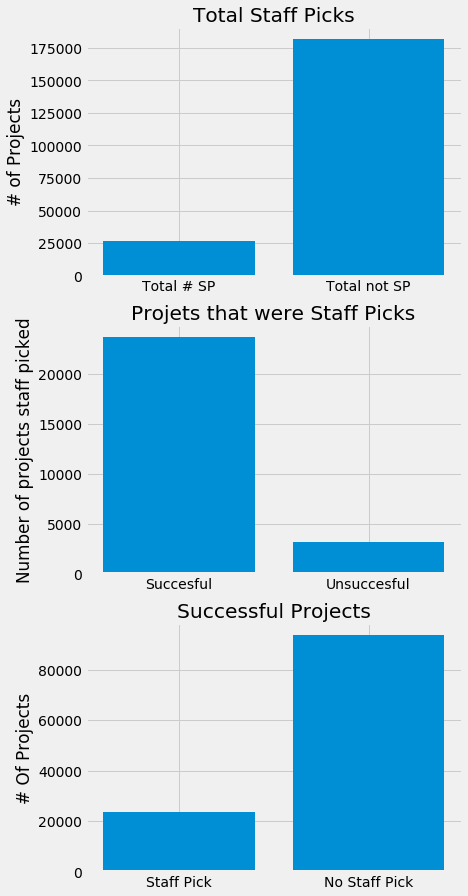

In [8]:
objects = ('Staff Pick', 'No Staff Pick')
y_pos = np.arange(len(objects))

plt.style.use('fivethirtyeight')

# print(Kickstart_2019.loc[:,'state'])

SP = Kickstart_2019[Kickstart_2019.loc[:,'staff_pick']==True]
Success = Kickstart_2019[Kickstart_2019.loc[:,'state']=='successful']
SuccessOfSP = [(Success.loc[:,'staff_pick']==True).sum(),(Success.loc[:,'staff_pick']==False).sum()]
SPofSuccess = [(SP.loc[:,'state']=='successful').sum(),(SP.loc[:,'state']!='successful').sum()]
 
plt.figure(1)

plt.subplot(313)
    
plt.bar(y_pos, SuccessOfSP, align='center', alpha=1)
plt.xticks(y_pos, objects)
plt.ylabel('# Of Projects')
plt.title('Successful Projects')

plt.subplot(312)

plt.bar(y_pos, SPofSuccess, align='center', alpha=1)
plt.xticks(y_pos, ('Succesful', 'Unsuccesful'))
plt.ylabel('Number of projects staff picked')
plt.title('Projets that were Staff Picks')


plt.subplot(311)

plt.bar(y_pos, [(Kickstart_2019.loc[:,'staff_pick']==True).sum(), (Kickstart_2019.loc[:,'staff_pick']==False).sum()])
plt.xticks(y_pos, ('Total # SP', 'Total not SP'))
plt.ylabel('# of Projects')
plt.title('Total Staff Picks')


plt.subplots_adjust(top=3)


plt.show()

## Lets look at some graphs

First lets look at the first graph. We can see that the vast majority of projects are not Staff Picks. We can see that roughly 1 in every 8 projects is picked to be showcased by the staff. Looking at the second graph we see that being a staff pick is a very good indicator that the project will be successful. Of the 25,000 projects that were picked by the staff only about 3,000 (or 12%) of them were unsuccessful. Lastly we are analyzing How large of a portion of the successful projects do staff picks take up. We can see that staff picks are certainly present but are clearly not the only indicator for a successful project. So in short, most staff picks are successful but most succesful projects are not staff picks

## And some more cleaning time ...

So now we need to clean up the 2019 data because we havent done that yet. If we want to use a ML algorithm in order to predict the future success of a project we cant train our model with time series data such as backers_count or usd_pledged. Because these values change over time we cannot use them to predict future success when we only know the ending values. So the only data that is relevent and we can use is Category, Country*, Time Created_at, deadline, if communication is disabled, the goal amount, and if it is a staff pick or not. This does not leave much data for our algorithm to use so we will try to gather some more later to see if we can improve our accuracy score. 

First thing is first though, we need to get rid of any project that has a 'Live' state. Then we need to get the category and creator names out of the JSON format. Then we will just take our data and create a new pandas dataframe for it. After categorizing the data so the strings can be recognized by the scikit algorithm we will see what we can get for an accuracy score.

**For all intents and purposes Country and Currency code are equal in this context*<br/>
**usd_type is not used because it is covered by country*<br/>

In [9]:
#Dropped live projects and dropped unneeded rows
FinishedProjects = Kickstart_2019[(Kickstart_2019.loc[:,'state']!='live') & (Kickstart_2019.loc[:,'state']!='cancelled') & (Kickstart_2019.loc[:,'state']!='suspended')]
FinishedProjects = FinishedProjects.drop(axis=1,labels=['backers_count','blurb','converted_pledged_amount',
                                                        'currency_symbol','currency_trailing_code', 'fx_rate',
                                                        'slug','urls','state_changed_at','static_usd_rate','usd_pledged',
                                                        'usd_type','friends','name','permissions','pledged','profile',
                                                        'source_url','spotlight','current_currency','id','is_backing',
                                                        'photo','is_starrable','is_starred','currency', 'location','creator'])

#Changes category to proper non json format
# print(json.loads(FinishedProjects.loc[208473,'category'])['slug'].split('/',1)[0])

FinishedProjects.category = pd.io.json.json_normalize(FinishedProjects.category.apply(json.loads)).loc[:,'slug'].str.split('/',1).str.get(0)

In [14]:
from sklearn import preprocessing

FinishedProjects=FinishedProjects.dropna().reset_index(drop=True)

OHEtrain = pd.concat([FinishedProjects.loc[:,'category'], FinishedProjects.loc[:,'country']], axis=1)

enc = preprocessing.OneHotEncoder()
OHEtrain = pd.DataFrame(enc.fit_transform(OHEtrain).todense())

In [15]:
X = pd.concat([OHEtrain, FinishedProjects.drop(axis=1, labels=['category','country','state'])], axis=1)
y = FinishedProjects.loc[:,'state']

## Time to learn

So we will try a bunch of different classification models to apply our data to and we will see which one is best. Im not going to take that much time tuning parameters right now but I may try to tune some more in the future. I am spliting the data in 5 groups and cross validating with them for all tests and I am going to try to run the process on all cores whenever possible to get faster run times

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.preprocessing import Normalizer, PolynomialFeatures

In [17]:
# model = KNeighborsClassifier(n_neighbors=6)
#65% Accuracy

# model = GaussianNB()
#59% Accuracy

# model = MLPClassifier()
#48% Accuracy

# model = ExtraTreesClassifier(n_estimators=100, min_samples_split=3, n_jobs=-1)
#66% Accuracy

# model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
#67% Accuracy

# model = SGDClassifier()
#41% Accuracy

model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                               max_depth=None, max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=1e-07, min_samples_leaf=1,
                               min_samples_split=2, min_weight_fraction_leaf=0.0,
                               n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
                               verbose=0, warm_start=True)
#68% Accuracy

model.fit(X, y)

scores = cross_val_score(model, X, y, cv=5)

In [19]:
print(scores)
print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.68251034 0.68176566 0.68314416 0.68468492 0.68411997]
Accuracy: 0.6832 (+/- 0.00)


## Better than I thought

With just using the data that is generated from the kickstarter api we were able to get an acuracy of 67%. With the limited info that we have This is a much better accuracy that I thought we would get. Once we get the social media scores we should see a large bump in this accuracy

## Lets gather some more data

For this we will use the reddit praw api to get number of post on reddit that have 'Kickstarter' and the name of each project in them. This should improve our score just by giving us another data point that I will assume will have a lot more influence. A lot of zeros and ones are expected for the most part. Hopefully after this data is added we can get an accuracy score of over 70% This should take a long time because of how reddit limits the rate at which API users can access queries so this wont be quick.

In [20]:
import praw
import time

In [21]:
reddit = praw.Reddit(client_id = 'JqZsueXReTdJpw',
                     client_secret = 'sXjoSCHtgb_Ib6_HIwaCqYH2KHI',
                     user_agent = 'user agent')

names = Kickstart_2019.loc[:,'name']

In [22]:
# temp = list()
# j = 0

temp = pd.read_csv('SocialScore.csv', header=None).iloc[:,1].tolist()
j = len(temp)

In [23]:
allreddit = reddit.subreddit('all')
# for i in names[j:]:
#     temp.append(len(list(allreddit.search(('Kickstarter ' + i), limit=None))))
#     j+=1
#     time.sleep(0.25)

In [24]:
# print(j)
# print((j/len(Kickstart_2019))*100)

In [25]:
# pd.Series(temp).to_csv('SocialScore.csv')

In [26]:
SocialMediaScore = pd.DataFrame(temp, columns=['SocialScore'])
Kickstart_2019.insert(0, 'Social Score', SocialMediaScore)

## Reddit Data

I gathered data using reddit's PRAW API. I created a list of integers that represents the number of search results returned when 'Kickstarter' + name is searched for on reddit. This should give a very crude score to the social engagement of each kickstarter. This goes slightly agaisnt my predefined characteristics for proper features because this includeds data for after the project's end date. This could shift the results to make the model more accurate but also make the predicitivity of the model on future projects less accurate. We could shift to only look at social media engagement before the project ends but due to time reasons I decided to just leave it the way it is

# Lets see how much better we can do

In [64]:
#Dropped live projects and dropped unneeded rows
FinishedProjects = Kickstart_2019[(Kickstart_2019.loc[:,'state']!='live') & (Kickstart_2019.loc[:,'state']!='canceled') & (Kickstart_2019.loc[:,'state']!='suspended')]
FinishedProjects = FinishedProjects.drop(axis=1,labels=['backers_count','blurb','converted_pledged_amount',
                                                        'currency_symbol','currency_trailing_code', 'fx_rate',
                                                        'slug','urls','state_changed_at','static_usd_rate','usd_pledged',
                                                        'usd_type','friends','name','permissions','pledged','profile',
                                                        'source_url','spotlight','current_currency','id','is_backing',
                                                        'photo','is_starrable','is_starred','currency', 'location','creator'])

#Changes category to proper non json format
# print(json.loads(FinishedProjects.loc[208473,'category'])['slug'].split('/',1)[0])

FinishedProjects.category = pd.io.json.json_normalize(FinishedProjects.category.apply(json.loads)).loc[:,'slug'].str.split('/',1).str.get(0)

In [65]:
FinishedProjects=FinishedProjects.dropna().reset_index(drop=True)
OHEtrain = pd.concat([FinishedProjects.loc[:,'category'], FinishedProjects.loc[:,'country']], axis=1)

enc = preprocessing.OneHotEncoder()
OHEtrain = pd.DataFrame(enc.fit_transform(OHEtrain).todense())

In [66]:
X = pd.concat([OHEtrain, FinishedProjects.drop(axis=1, labels=['category','country','state'])], axis=1)
y = FinishedProjects.loc[:,'state']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=0.70)

C:\Users\richmondc1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble.weight_boosting import AdaBoostClassifier


# model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
#                                max_depth=None, max_features='auto', max_leaf_nodes=None,
#                                min_impurity_decrease=1e-07, min_samples_leaf=1,
#                                min_samples_split=2, min_weight_fraction_leaf=0.0,
#                                n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
#                                verbose=0, warm_start=True)
#71.93% Accuracy

model = make_pipeline(PolynomialFeatures(2),
                      RandomForestClassifier(bootstrap=True, criterion='gini',
                               max_depth=None, max_features='auto', max_leaf_nodes=None,
                               min_impurity_decrease=1e-07, min_samples_leaf=1,
                               min_samples_split=2, min_weight_fraction_leaf=0.0,
                               n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
                               verbose=0, warm_start=True))


params = {
    'randomforestclassifier__n_estimators':[20,30,40,50,60],
}

# search = GridSearchCV(model, params, n_jobs=-1, cv=4)
# search.fit(X_train, y_train)

model.fit(X_train, y_train)

# print("GridSearch Best Parameters %s", search.best_params_)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('randomforestclassifier', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurit...imators=50, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0, warm_start=True))])

In [49]:
print("Train accuracy is %.2f %%" % (model.score(X_train, y_train)*100))
print("Test accuracy is %.2f %%" % (model.score(X_test, y_test)*100))

Train accuracy is 99.75 %
Test accuracy is 71.10 %


In [33]:
search.cv_results_
search.best_score_

0.6939366317861961

In [43]:
#display method, from:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels((y_true)), (y_pred)))]
    #ME: disable above functionality for the PA
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Normalized confusion matrix
[[0.56156672 0.43843328]
 [0.18514763 0.81485237]]


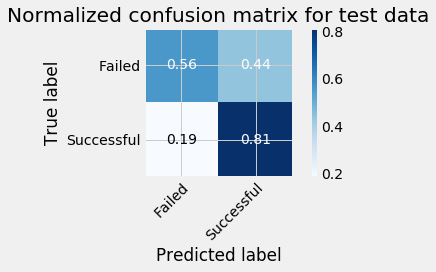

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_model = model.predict(X_test)

target_labels = ['Failed', 'Successful']

plot_confusion_matrix(y_test, y_model, classes=target_labels, normalize=True,
                      title='Normalized confusion matrix for test data')
plt.show()

## Conclusion

In the end I could only get a 72% accuracy score out of the model. This is mostly due to me improving the data and not much due to the social media score that I collected. The social media score wasnt quite as useful as I expected mostly likey due to 2 factors. The first is the maximum search query in the PRAW API is 250 results which quickly puts a ceiling to more popular kickstarter campaigns. The second is the fact that we could be getting many post on reddit that are not relavent to the kickstarter or that speak negatively to the project. We can also see in the confusion matrix that almost any model we try it will over predict the success of a project and it is hard to strike the right balance of success and failure. With some better analysis of the posts we could improve this score but also considereing how sparse this data is with relavency the factors that actually make a kickstarter succuessful I would say 72% accuracy is a great score.

# LIVE DEMO

In [76]:
TestProjects = Kickstart_2019

ProjectNames = Kickstart_2019.loc[:,'name'][Kickstart_2019.loc[:,'state']=='live']

TestProjects = TestProjects.drop(axis=1,labels=['backers_count','blurb','converted_pledged_amount',
                                                        'currency_symbol','currency_trailing_code', 'fx_rate',
                                                        'slug','urls','state_changed_at','static_usd_rate','usd_pledged',
                                                        'usd_type','friends','name','permissions','pledged','profile',
                                                        'source_url','spotlight','current_currency','id','is_backing',
                                                        'photo','is_starrable','is_starred','currency', 'location','creator'])

#Changes category to proper non json format
# print(json.loads(FinishedProjects.loc[208473,'category'])['slug'].split('/',1)[0])

TestProjects.category = pd.io.json.json_normalize(TestProjects.category.apply(json.loads)).loc[:,'slug'].str.split('/',1).str.get(0)

TestProjects=TestProjects.dropna().reset_index(drop=True)
OHEtrain = pd.concat([TestProjects.loc[:,'category'], TestProjects.loc[:,'country']], axis=1)

enc = preprocessing.OneHotEncoder()
OHEtest = pd.DataFrame(enc.fit_transform(OHEtrain).todense())

Xlive = pd.concat([OHEtest, TestProjects.drop(axis=1, labels=['category','country'])], axis=1)

Xlive = Xlive[Xlive.loc[:,'state'] == 'live'].drop(columns='state')

In [78]:
Xlive

,0,1,2,3,4,5,6,7,8,9,...,34,35,36,Social Score,created_at,deadline,disable_communication,goal,launched_at,staff_pick
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1544546012,1550189608,False,700.0,1547165608,True
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1,1547863105,1551551495,False,10000.0,1548959495,False
28,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,35,1545942004,1551078000,False,3000.0,1545949157,False
45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1549051560,1552002922,False,500.0,1549410922,False
51,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1549875145,1551160740,False,3000.0,1549878768,False
103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0,1548982586,1551398355,False,200.0,1549583955,False
140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3,1547737415,1550893214,False,10000.0,1548301214,False
182,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1547779595,1550804128,False,1208.0,1548212128,False
225,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0,1521463945,1551115850,False,40000.0,1545931850,False
232,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0,1548949848,1551974400,False,800.0,1549382400,False


In [79]:
result = model.predict(Xlive)

In [88]:
pd.concat([ProjectNames.reset_index(), pd.Series(result)], axis=1)

,index,name,0
0,4,Dungeon Corp LTD.: The Adventures of Bob and Tim.,successful
1,12,The Gotham Metropolis Project,successful
2,28,Star Wars: A Drop Of Light,successful
3,45,Last Emperor: The Annals of Xiao-Xian,successful
4,51,·Dear Mom & Dad · A Letter to Loved Ones Lost ...,successful
5,103,Legacy of the Ancients - Campaign Setting & Pl...,successful
6,140,The Forever Sand Castle,successful
7,182,Pikachu and Eevee Galaxy Pins,successful
8,225,One Parka - The ultimate winter jacket for kids,failed
9,232,Solve et Coagula Hard Enamel Pin set,successful
